In [283]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [284]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [285]:
data = pd.read_excel("Data Professional Survey dataset.xlsx")

In [286]:
data.head(10)
pd.set_option('display.max_columns', None)
data.head(10)

,Unique ID,Email,Date Taken (America/New_York),Time Taken (America/New_York),Browser,OS,City,Country,Referrer,Time Spent,Q1 - Which Title Best Fits your Current Role?,Q2 - Did you switch careers into Data?,Q3 - Current Yearly Salary (in USD),Q4 - What Industry do you work in?,Q5 - Favorite Programming Language,Q6 - How Happy are you in your Current Position with the following? (Salary),Q6 - How Happy are you in your Current Position with the following? (Work/Life Balance),Q6 - How Happy are you in your Current Position with the following? (Coworkers),Q6 - How Happy are you in your Current Position with the following? (Management),Q6 - How Happy are you in your Current Position with the following? (Upward Mobility),Q6 - How Happy are you in your Current Position with the following? (Learning New Things),Q7 - How difficult was it for you to break into Data?,"Q8 - If you were to look for a new job today, what would be the most important thing to you?",Q9 - Male/Female?,Q10 - Current Age,Q11 - Which Country do you live in?,Q12 - Highest Level of Education,Q13 - Ethnicity
0,62a33b3db4da29969c62df3d,anonymous,6/10/2022,8:38,NaN,NaN,NaN,NaN,NaN,0:00:44,Data Analyst,Yes,106k-125k,Healthcare,Python,9.0,9.0,7.0,5.0,5.0,7.0,Very Difficult,Remote Work,Male,26,United States,NaN,White or Caucasian
1,62a33ba1bae91e4b8b82e35c,anonymous,6/10/2022,8:40,NaN,NaN,NaN,NaN,NaN,0:01:30,Data Analyst,No,41k-65k,Finance,R,1.0,2.0,5.0,2.0,1.0,3.0,Very Difficult,Remote Work,Male,36,Canada,NaN,Asian or Asian American
2,62a33c2cbc6861bf3176bec1,anonymous,6/10/2022,8:42,NaN,NaN,NaN,NaN,NaN,0:02:18,Data Engineer,No,0-40k,Other (Please Specify):Clean Energy,Python,0.0,8.0,7.0,5.0,7.0,7.0,Easy,Good Work/Life Balance,Male,23,Other (Please Specify):Nigeria,NaN,Black or African American
3,62a33c8624a26260273822f9,anonymous,6/10/2022,8:43,NaN,NaN,NaN,NaN,NaN,0:02:10,Other (Please Specify):Analytics Consultant,Yes,150k-225k,Finance,R,10.0,6.0,7.0,10.0,7.0,10.0,Very Easy,Remote Work,Female,35,Canada,NaN,White or Caucasian
4,62a33c91f3072dd892621e03,anonymous,6/10/2022,8:44,NaN,NaN,NaN,NaN,NaN,0:01:51,Data Analyst,Yes,41k-65k,Healthcare,R,1.0,4.0,4.0,4.0,0.0,1.0,Difficult,Better Salary,Male,44,United States,NaN,Black or African American
5,62a33cb6cf25554317300177,anonymous,6/10/2022,8:44,NaN,NaN,NaN,NaN,NaN,0:02:34,Data Analyst,Yes,0-40k,Other (Please Specify):Coworking space,Python,2.0,3.0,3.0,3.0,3.0,2.0,Difficult,Good Work/Life Balance,Male,33,Other (Please Specify):Republic democratic of ...,NaN,Black or African American
6,62a33cb72e54c9003e531c65,anonymous,6/10/2022,8:44,NaN,NaN,NaN,NaN,NaN,0:01:15,Data Scientist,Yes,0-40k,Finance,Python,0.0,6.0,6.0,6.0,6.0,5.0,Difficult,Better Salary,Male,24,Other (Please Specify),NaN,Black or African American
7,62a33cd30f8c8599d5af0f8f,anonymous,6/10/2022,8:45,NaN,NaN,NaN,NaN,NaN,0:01:25,Data Engineer,Yes,125k-150k,Other (Please Specify):Retail,Other:SQL,10.0,5.0,5.0,5.0,5.0,9.0,Neither easy nor difficult,Remote Work,Male,35,United States,NaN,Asian or Asian American
8,62a33cd3cf255543173001d9,anonymous,6/10/2022,8:45,NaN,NaN,NaN,NaN,NaN,0:02:10,Data Analyst,Yes,86k-105k,Healthcare,R,4.0,4.0,4.0,4.0,5.0,5.0,Neither easy nor difficult,Better Salary,Male,35,United States,NaN,Asian or Asian American
9,62a33cd8bc6861bf3176c05f,anonymous,6/10/2022,8:45,NaN,NaN,NaN,NaN,NaN,0:01:27,Data Analyst,Yes,41k-65k,Telecommunication,Python,2.0,0.0,3.0,3.0,0.0,4.0,Very Difficult,Better Salary,Male,28,United States,NaN,Hispanic or Latino


In [287]:
salary_col = 'Q6 - How Happy are you in your Current Position with the following? (Salary)'
balance_col = 'Q6 - How Happy are you in your Current Position with the following? (Work/Life Balance)'
coworker='Q6 - How Happy are you in your Current Position with the following? (Coworkers)'
management='Q6 - How Happy are you in your Current Position with the following? (Management)'
mobility='Q6 - How Happy are you in your Current Position with the following? (Upward Mobility)'
age='Q6 - How Happy are you in your Current Position with the following? (Learning New Things)'

In [288]:
data = data.dropna(subset=[salary_col, balance_col,coworker,management,mobility,age])

In [289]:
X=data[['Q6 - How Happy are you in your Current Position with the following? (Salary)','Q6 - How Happy are you in your Current Position with the following? (Coworkers)',management,mobility]]
y=data['Q6 - How Happy are you in your Current Position with the following? (Work/Life Balance)']

In [290]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=42)

In [291]:
model=LinearRegression()

In [292]:
known_and_unknown=cross_val_score(model, X, y, cv=5, scoring='neg_root_mean_squared_error')

In [293]:
known_and_unknown.mean()

np.float64(-1.7970982529501143)

### if you look at the data for the cross_val_score then with score of neg root mean squared error is very less that is -2.30385  etc so it is better to use linear regression model 

In [294]:
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [295]:
prediction=model.predict(X_test)

In [296]:
prediction.shape

(184,)

In [297]:
y_test-prediction 

82    -0.104059
225   -0.044022
56     0.209010
618    0.112178
273   -0.044022
         ...   
383   -0.166870
267   -3.195876
310    1.059507
235    1.384816
427   -0.037995
Name: Q6 - How Happy are you in your Current Position with the following? (Work/Life Balance), Length: 184, dtype: float64

In [298]:
from sklearn.metrics import r2_score

In [299]:
r2_score(y_test,prediction)

0.5654582516944687

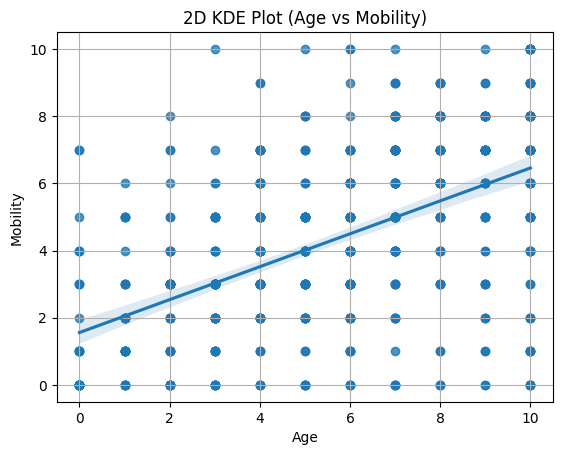

In [300]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(
    x=data[age],
    y=data[salary_col]
)

plt.xlabel("Age")
plt.ylabel("Mobility")
plt.title("2D KDE Plot (Age vs Mobility)")
plt.grid(True)
plt.show()


In [301]:
data['Q2 - Did you switch careers into Data?'] = data['Q2 - Did you switch careers into Data?'].apply(lambda x: 1 if str(x).strip().lower() == 'yes' else 0)


In [244]:
data.head(10)

,Unique ID,Email,Date Taken (America/New_York),Time Taken (America/New_York),Browser,OS,City,Country,Referrer,Time Spent,Q1 - Which Title Best Fits your Current Role?,Q2 - Did you switch careers into Data?,Q3 - Current Yearly Salary (in USD),Q4 - What Industry do you work in?,Q5 - Favorite Programming Language,Q6 - How Happy are you in your Current Position with the following? (Salary),Q6 - How Happy are you in your Current Position with the following? (Work/Life Balance),Q6 - How Happy are you in your Current Position with the following? (Coworkers),Q6 - How Happy are you in your Current Position with the following? (Management),Q6 - How Happy are you in your Current Position with the following? (Upward Mobility),Q6 - How Happy are you in your Current Position with the following? (Learning New Things),Q7 - How difficult was it for you to break into Data?,"Q8 - If you were to look for a new job today, what would be the most important thing to you?",Q9 - Male/Female?,Q10 - Current Age,Q11 - Which Country do you live in?,Q12 - Highest Level of Education,Q13 - Ethnicity
0,62a33b3db4da29969c62df3d,anonymous,6/10/2022,8:38,NaN,NaN,NaN,NaN,NaN,0:00:44,Data Analyst,NaN,NaN,Healthcare,Python,9.0,9.0,7.0,5.0,5.0,7.0,Very Difficult,Remote Work,Male,26,United States,NaN,White or Caucasian
1,62a33ba1bae91e4b8b82e35c,anonymous,6/10/2022,8:40,NaN,NaN,NaN,NaN,NaN,0:01:30,Data Analyst,NaN,NaN,Finance,R,1.0,2.0,5.0,2.0,1.0,3.0,Very Difficult,Remote Work,Male,36,Canada,NaN,Asian or Asian American
2,62a33c2cbc6861bf3176bec1,anonymous,6/10/2022,8:42,NaN,NaN,NaN,NaN,NaN,0:02:18,Data Engineer,NaN,NaN,Other (Please Specify):Clean Energy,Python,0.0,8.0,7.0,5.0,7.0,7.0,Easy,Good Work/Life Balance,Male,23,Other (Please Specify):Nigeria,NaN,Black or African American
3,62a33c8624a26260273822f9,anonymous,6/10/2022,8:43,NaN,NaN,NaN,NaN,NaN,0:02:10,Other (Please Specify):Analytics Consultant,NaN,NaN,Finance,R,10.0,6.0,7.0,10.0,7.0,10.0,Very Easy,Remote Work,Female,35,Canada,NaN,White or Caucasian
4,62a33c91f3072dd892621e03,anonymous,6/10/2022,8:44,NaN,NaN,NaN,NaN,NaN,0:01:51,Data Analyst,NaN,NaN,Healthcare,R,1.0,4.0,4.0,4.0,0.0,1.0,Difficult,Better Salary,Male,44,United States,NaN,Black or African American
5,62a33cb6cf25554317300177,anonymous,6/10/2022,8:44,NaN,NaN,NaN,NaN,NaN,0:02:34,Data Analyst,NaN,NaN,Other (Please Specify):Coworking space,Python,2.0,3.0,3.0,3.0,3.0,2.0,Difficult,Good Work/Life Balance,Male,33,Other (Please Specify):Republic democratic of ...,NaN,Black or African American
6,62a33cb72e54c9003e531c65,anonymous,6/10/2022,8:44,NaN,NaN,NaN,NaN,NaN,0:01:15,Data Scientist,NaN,NaN,Finance,Python,0.0,6.0,6.0,6.0,6.0,5.0,Difficult,Better Salary,Male,24,Other (Please Specify),NaN,Black or African American
7,62a33cd30f8c8599d5af0f8f,anonymous,6/10/2022,8:45,NaN,NaN,NaN,NaN,NaN,0:01:25,Data Engineer,NaN,NaN,Other (Please Specify):Retail,Other:SQL,10.0,5.0,5.0,5.0,5.0,9.0,Neither easy nor difficult,Remote Work,Male,35,United States,NaN,Asian or Asian American
8,62a33cd3cf255543173001d9,anonymous,6/10/2022,8:45,NaN,NaN,NaN,NaN,NaN,0:02:10,Data Analyst,NaN,NaN,Healthcare,R,4.0,4.0,4.0,4.0,5.0,5.0,Neither easy nor difficult,Better Salary,Male,35,United States,NaN,Asian or Asian American
9,62a33cd8bc6861bf3176c05f,anonymous,6/10/2022,8:45,NaN,NaN,NaN,NaN,NaN,0:01:27,Data Analyst,NaN,NaN,Telecommunication,Python,2.0,0.0,3.0,3.0,0.0,4.0,Very Difficult,Better Salary,Male,28,United States,NaN,Hispanic or Latino
